In [12]:
import numpy as np

import matplotlib.pyplot as plt

import scipy
from scipy import stats

In [ ]:
%load_ext cython

---
Exo 6

In [3]:
from scipy import integrate

In [9]:
integrate.quad(lambda x: x, 0,1),

((0.5, 5.551115123125783e-15),)

In [10]:
integrate.quad(lambda x: 1/(10+x), 0,1),

((0.09531017980432485, 1.0581555609992505e-15),)

In [13]:
np.log(11) - np.log(10)

0.09531017980432477

In [17]:
I_n = [np.log(11) - np.log(10)]
for k in range(1,10):
    I_n.append( 1/k - 10*I_n[-1])
    
I_n

[0.09531017980432477,
 0.04689820195675232,
 0.031017980432476833,
 0.023153529008564988,
 0.01846470991435012,
 0.015352900856498819,
 0.013137658101678468,
 0.011480561840358172,
 0.010194381596418278,
 0.009167295146928323]

check

In [19]:
integrate.quad(lambda x: x**9/(10 + x), 0,1),

((0.00916720344811137, 1.0177640339516369e-16),)

In [20]:
integrate.quad(lambda x: x**30/(10 + x), 0,1),

((0.0029409287048613284, 1.4114579243116296e-15),)

$$\int_0^1 \frac{x^{30}}{10 + x} 
\sim \int_0^1 \frac{x^{30}}{11}
= \frac{1}{11} \times \frac{1}{31}$$

In [24]:
1/11/31

0.002932551319648094

---

# Exo 7

## relative error

https://matthew-brett.github.io/teaching/floating_error.html

In [ ]:
from math import  log10, floor
x = -0.1234 # a number with greater precision than format allows
p = 3 # number of digits in mantissa
x1 = abs(x) # 0.1234
e1 = log10(x1) # -0.9086848403027772
exponent = floor(e1) # -1
m1 = x / 10 ** exponent # -1.234
mantissa = round(m1, p-1) # -1.23
exponent, mantissa

---

# Exo 8



In [183]:
sum(np.linalg.eigvals(A)), np.linalg.eigvals(A)

(15.999999999999988,
 array([3.87938524, 3.53208889, 3.        , 2.34729636, 1.65270364,
        0.12061476, 0.46791111, 1.        ]))

# Better to 

write a function to generate the matrix $A$

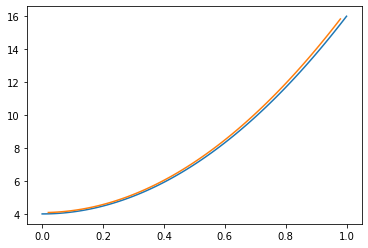

In [185]:
def M(n):
    A = 2*np.identity(n)
    for i in range(n-1):
        A[i,i+1] = A[i+1,i] = -1
    return A


X = np.linspace(0,1,100)

plt.plot(X, 12*X**2+4);
# this doesn't work with @
plt.plot(X[2:-2], -100**2*M(100).dot(X**4+ 2*X**2)[2:-2]);

0.0034362595476501016

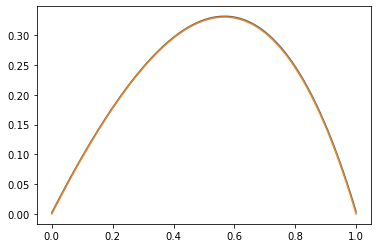

In [186]:

N = 500
# subdivision of the interval
X = np.linspace(0,1,N)
h = (X[1] - X[0])

# -A/h^2 + C
B = M(N)/(h**2) + np.diag(X)
# this is probably more accurate as N**2 has no rounding error
B = M(N)*(N**2) + np.diag(X)

f = (1 + 2*X - X**2)*np.exp(X) + X**2 - X
g = (1-X)*(np.exp(X)-1)

Y = np.linalg.solve(B, f)
plt.plot(X, Y)
plt.plot(X, g);

np.max(np.abs(Y - g))

---

# Jacobi method

In numerical linear algebra, the Jacobi method is an iterative algorithm for determining the solutions of a strictly diagonally dominant system of linear equations. Each diagonal element is solved for, and an approximate value is plugged in. The process is then iterated until it converges. This algorithm is a stripped-down version of the Jacobi transformation method of matrix diagonalization. The method is named after Carl Gustav Jacob Jacobi.

https://en.wikipedia.org/wiki/Jacobi_method

In [232]:
C = np.array([2,1,5,7]).reshape(2,2)

In [32]:
def decompose(C):
    D = np.array([C[i,i] for i in range(C.shape[0])])
    LU = np.copy(C) - np.diag(D)
    return D, LU

V = np.ones(2)
b = np.array([11,13])
D, LU = decompose(C)

In [732]:
for k in range(20):
    #V = (-LU.dot(V) + b)/D
    V = V + (-C.dot(V) + b)/D
C.dot(V)

array([10.99999999, 13.        ])

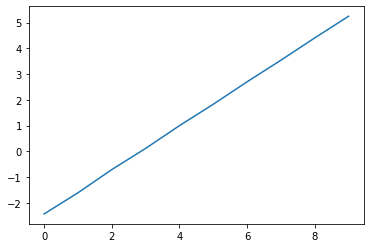

In [42]:
# initialize the matrix
C = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])
# initialize the RHS vector
b = np.array([6., 25., -11., 15.])
V = np.zeros_like(C[0])

D, LU = decompose(C)

VS = []
for k in range(10):
    V = (-LU.dot(V) + b)/D
    VS.append(V)

E = [np.linalg.norm( b - C.dot(v)) for v in VS]
plt.plot(-np.log(E));

In [38]:
from scipy import stats

         
stats.linregress(np.arange(len(E)),-np.log(E))

LinregressResult(slope=0.854590388387257, intercept=-2.4365624942108233, rvalue=0.9999854699430567, pvalue=1.950023073529421e-19, stderr=0.001628794894121396)

# Eigenvalues

In [50]:
ev, evv = np.linalg.eig(np.linalg.inv(np.diag(D).dot(C)))

array([10., 11., 10.,  8.])

---

## Jacobi applied to the exo 8

In [28]:
N = 200
X = np.linspace(0,1,N)

B = M(N)*(N**2) + np.diag(X)
# target function
b = (1 + 2*X - X**2)*np.exp(X) + X**2 - X 
# exact solution
g = (1-X)*(np.exp(X)-1)
# initial guess
V = np.ones(N)

# could use
# D = 2*N**2 - X

D = np.array([B[i,i] for i in range(N)])

## Iteration loop

In [29]:
#%%timeit
E = []
for k in range(4000):
    #V = (-LU.dot(V) + b)/D
    V = V + (-B.dot(V) + b)/D
    E.append(np.linalg.norm(V - g,np.inf))
    

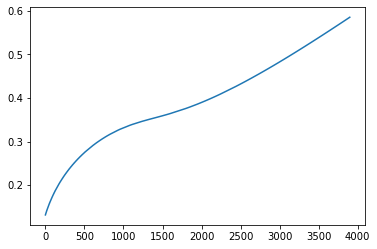

In [30]:
plt.plot(-np.log(np.array(E[100:])))

(0.008589502825312118, 0.008589502825312118)

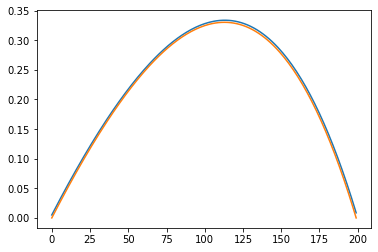

In [367]:
plt.plot(V);
plt.plot(g );

np.max(np.abs(V - g)), np.linalg.norm(V-g, np.inf)

In [363]:
#%%timeit
K = N**2*np.array([1,-2,1])

for k in range(500000):
    #trick to avoid matrix multiplication
    V = V + ( np.convolve(V, K, mode='same')- X*V + b)/D
    

---

# Convergence

- easy case $C$ symmetric positive definite
- $(L + U)/D$ has a dominant eigenvalue

In [52]:
C = np.array([2,1,1,1]).reshape(2,2)

In [56]:
D = np.array([C[i,i] for i in range(C.shape[0])])

In [66]:
C.dot([0,1])

array([1, 1])

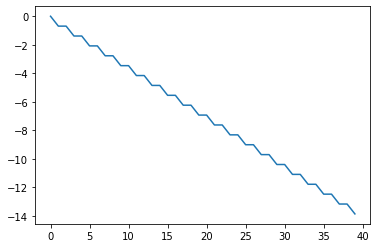

In [91]:
C = np.array([2,1,1,1]).reshape(2,2)
D = np.array([C[i,i] for i in range(C.shape[0])])
V = np.ones(2)
b = np.ones(2)

E = []
for k in range(40):
    #V = (-LU.dot(V) + b)/D
    V = V + (-C.dot(V) + b)/D
    E.append(np.linalg.norm(V - [0,1]))
plt.plot(np.log(E));

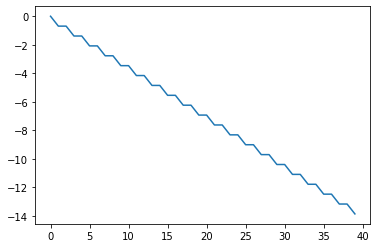

In [92]:
plt.plot(np.log(E));

In [93]:
DC = np.diag(D)
ee, vv = np.linalg.eig((C-DC)/D)

array([[2, 0],
       [0, 1]])

---

# LU 

[wiki entry](https://en.wikipedia.org/wiki/LU_decomposition)

It turns out that a proper permutation in rows (or columns) is sufficient for LU factorization. LU factorization with partial pivoting (LUP) refers often to LU factorization with row permutations only:

$PA=LU$

where 
- L and U are again lower and upper triangular matrices
- P is a permutation matrix, which, when left-multiplied to A, reorders the rows of A.

It turns out that all square matrices can be factorized in this form 
[Pavel Okunev, Charles R. Johnson 1997](https://arxiv.org/abs/math/0506382)

and the factorization is numerically stable in practice.

This makes LUP decomposition a useful technique in practice.


Look at [discussion and python 2 code](https://www.quantstart.com/articles/LU-Decomposition-in-Python-and-NumPy/)

In [102]:
A = np.array([1,4,-1,2]).reshape(2,2)

In [13]:
import scipy
from scipy import linalg

In [14]:
scipy.linalg.lu(A)

(array([[1., 0.],
        [0., 1.]]),
 array([[1., 0.],
        [1., 1.]]),
 array([[1., 1.],
        [0., 1.]]))

In [155]:
B = [-1,3,0,1,0,-4,2,0,5]
B = np.array(B).reshape(3,3)
B

array([[-1,  3,  0],
       [ 1,  0, -4],
       [ 2,  0,  5]])

In [159]:
P,L,U = scipy.linalg.lu(B)

In [178]:
P @ L @ U 

array([[-1.,  3.,  0.],
       [ 1.,  0., -4.],
       [ 2.,  0.,  5.]])

In [179]:
P

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [180]:
np.linalg.inv(P) @ B

array([[ 2.,  0.,  5.],
       [-1.,  3.,  0.],
       [ 1.,  0., -4.]])

In [157]:
np.linalg.solve(B,[1,2,3])

array([ 1.69230769,  0.8974359 , -0.07692308])

In [174]:
np.linalg.inv(P) @ [1,2,3]

array([3., 1., 2.])

---

## Solving linear equations

Given a system of linear equations in matrix form

$ A\mathbf {x} =\mathbf {b} $
we want to solve the equation for x, given A and b. 

Suppose we have already obtained the $LUP$ decomposition of $A$ such that

$PA=LU$ , so $LU\mathbf {x} =P\mathbf {b}$.

In this case the solution is done in two logical steps:

1. solve the equation
$L\mathbf {y} =P\mathbf {b} $ for y.
1. solve the equation $U\mathbf {x} =\mathbf {y} $ for x.


In both cases we are dealing with triangular matrices (L and U), which can be solved directly **by forward and backward substitution** without using the Gaussian elimination process (however we do need this process or equivalent to compute the LU decomposition itself).

In [6]:

a = 1
A = np.array([a,1,1,2]).reshape(2,2)

In [8]:
import scipy

In [15]:
scipy.linalg.lu(A)

(array([[1., 0.],
        [0., 1.]]),
 array([[1., 0.],
        [1., 1.]]),
 array([[1., 1.],
        [0., 1.]]))

## non trivial permutation 

In [25]:
a = 0
A = np.array([a,1,1,2]).reshape(2,2)
P, L , U = scipy.linalg.lu(A)
P

array([[0., 1.],
       [1., 0.]])

In [26]:
P @ U, U

(array([[0., 1.],
        [1., 2.]]),
 array([[1., 2.],
        [0., 1.]]))

## singular decomposition

In [31]:
a = .5
A = np.array([a,1,1,2]).reshape(2,2)
P, L , U = scipy.linalg.lu(A)
L, U

(array([[1. , 0. ],
        [0.5, 1. ]]),
 array([[1., 2.],
        [0., 0.]]))

# Cholesky

- diagonal elements $l_{kk} = \sqrt{ a_{kk} - \sum^{k-1}_{j=1} l^2_{kj}}$
- off diagonal elts $l_{ik} = \frac{1}{l_{kk}} \left( a_{ik} - \sum^{k-1}_{j=1} l_{ij} l_{kj} \right)$



In [9]:
A = np.array([1,2,1,2,13, -1,1,-1, 3]).reshape(3,3)
A 

array([[ 1,  2,  1],
       [ 2, 13, -1],
       [ 1, -1,  3]])

In [5]:
import scipy.linalg

In [19]:
scipy.linalg.cholesky(A).T

array([[ 1.,  0.,  0.],
       [ 2.,  3.,  0.],
       [ 1., -1.,  1.]])

In [18]:
np.array(cholesky(A))

array([[ 1.,  0.,  0.],
       [ 2.,  3.,  0.],
       [ 1., -1.,  1.]])

In [26]:
def my_cholesky(A):
    """Performs a Cholesky decomposition of A, which must 
    be a symmetric and positive definite matrix. The function
    returns the lower variant triangular matrix, L."""
    n = len(A)

    # Create zero matrix for L
    L = np.zeros((n,n))

    # Perform the Cholesky decomposition
    for i in range(n):
        for k in range(i+1):
            tmp_sum = L[i,:].dot( L[k,:])
            
            if (i == k): # Diagonal elements
                # LaTeX: l_{kk} = \sqrt{ a_{kk} - \sum^{k-1}_{j=1} l^2_{kj}}
                L[i,k] = sqrt(A[i,i] - tmp_sum)
            else:
                # LaTeX: l_{ik} = \frac{1}{l_{kk}} \left( a_{ik} - \sum^{k-1}_{j=1} l_{ij} l_{kj} \right)
                L[i,k] = (1.0 / L[k,k] * (A[i,k] - tmp_sum))
    return L

my_cholesky(A)

array([[ 1.,  0.,  0.],
       [ 2.,  3.,  0.],
       [ 1., -1.,  1.]])

# QR decompositions


[source](https://www.quantstart.com/articles/QR-Decomposition-with-Python-and-NumPy/)

There are a few different algorithms for calculating the matrices $Q$ and $R$. 

We will outline the method of <a href="http://en.wikipedia.org/wiki/Householder_transformation">Householder Reflections</a>, which is known to be more numerically stable the  alternative Gramm-Schmidt method.

Note, the following explanation is an expansion of the extremely detailed article on <a href="http://en.wikipedia.org/wiki/QR_decomposition#Using_Householder_reflections">QR Decomposition using Householder Reflections.

A **Householder Reflection** is a linear transformation that enables a vector to be reflected through a plane or hyperplane. Essentially, we use this method because we want to create an upper triangular matrix, $R$. The householder reflection is able to carry out this vector reflection such that all but one of the coordinates disappears. The matrix $Q$ will be built up as a sequence of matrix multiplications that eliminate each coordinate in turn, up to the rank of the matrix $A$.

**First step** create the vector $\mathbb{x}$, which is the $k$-th column of the matrix $A$, for step $k$.
    
 We define $\alpha = -sgn(\mathbb{x}_k)(||\mathbb{x}||)$. The norm $||\cdot||$ used here is the *Euclidean norm*. 

 Given the first column vector of the identity matrix, $I$ of equal size to $A$, $\mathbb{e}_1 = (1,0,...,0)^T$, we create the vector $\mathbb{u}$:

\begin{eqnarray*}
\mathbb{u} = \mathbb{x} + \alpha \mathbb{e}_1
\end{eqnarray*}

<p>Once we have the vector $\mathbb{u}$, we need to convert it to a unit vector, which we denote as $\mathbb{v}$:</p>

\begin{eqnarray*}
\mathbb{v} = \mathbb{u}/||\mathbb{u}||
\end{eqnarray*}

**Second step** form the matrix of the Householder transformation $Q$ associated to $\mathbb{v}$ :

\begin{eqnarray*}
Q = I - 2 \mathbb{v} \mathbb{v}^T
\end{eqnarray*}

**Third step** $Q$ is now an $m\times m$ Householder matrix, with $Q\mathbb{x} = \left( \alpha, 0, ..., 0\right)^T$. We will use $Q$ to transform $A$ to upper triangular form, giving us the matrix $R$. 
    
Write  $Q_k$ for $Q$ at the $k$th tep  and, since $k=0$ in this first step, we have $Q_0$ as our first Householder matrix. 
Muliplying by   $A$ gives us:

\begin{eqnarray*}
Q_0A = \begin{bmatrix} \alpha_1&\star&\dots&\star\\ 0 & & & \\ \vdots & & A' & \\ 0 & & & \end{bmatrix}
\end{eqnarray*}

---
    
 The whole process is **recursive** and we repeat the 3 steps above for the minor matrix $A'$, which will give a second Householder matrix $Q'_1$. Now we have to "pad out" this minor matrix with elements from the identity matrix such that we can consistently multiply the Householder matrices together. Hence, we define $Q_k$ as the block matrix:

\begin{eqnarray*}
Q_k = \begin{pmatrix} I_{k-1} & 0\\ 0 & Q_k'\end{pmatrix}
\end{eqnarray*}

<p>Once we have carried out $t$ iterations of this process we have $R$ as an upper triangular matrix:</p>

\begin{eqnarray*}
R = Q_t ... Q_2 Q_1 A
\end{eqnarray*}

<p>$Q$ is then fully defined as the multiplication of the transposes of each $Q_k$:</p>

\begin{eqnarray*}
Q = Q^T_1 Q^T_2 ... Q^T_t
\end{eqnarray*}

<p>This gives $A=QR$, the QR Decomposition of $A$.</p>

In [187]:
def householder(A):
    """Performs a Householder Reflections based QR Decomposition of the                                               
    matrix A. The function returns Q, an orthogonal matrix and R, an                                                  
    upper triangular matrix such that A = QR."""
    n = len(A)
    # Set R equal to A, and create Q as a zero matrix of the same size
    R = A
    Q = np.identity(n)

    # The Householder procedure
    for k in range(n-1):  # We don't perform the procedure on a 1x1 matrix, so we reduce the index by 1
        # Create identity matrix of same size as A                                                                    
        I = np.identity(n)

        # Create the vectors x, e and the scalar alpha
        x = R[k:,k]
        e = I[k:,k]
        
        alpha = -np.sign(x[0]) * np.linalg.norm(x)

        u = x + alpha*e
        v = u/np.linalg.norm(u)

        # Create the Q minor matrix
        
        Q_min = np.identity(n-k) -  2*np.array([v[i]*v for i  in range(n-k) ])
        
        Q_t = np.identity(n)
        Q_t[k:,k:] = Q_min
     

        # If this is the first run through, right multiply by A,
        # else right multiply by Q
        if k == 0:
            Q = Q_t
            R = Q_t @ A
        else:
            Q = Q_t @ Q
            R = Q_t @  R

    # Since Q is defined as the product of transposes of Q_t,
    # we need to take the transpose upon returning it
    return Q.T, R

A = np.array([[12, -51, 4], 
              [6, 167, -68], 
              [-4, 24, -41]])
Q, R = householder(A)


Q @ R

array([[ 12., -51.,   4.],
       [  6., 167., -68.],
       [ -4.,  24., -41.]])

--- 

# eigenvalues using QR

! pip install tabulate

In [85]:
import numpy as np
from tabulate import tabulate

# A is a square random matrix of size n
n = 5
A = np.random.rand(n, n)
print("A=")
print(tabulate(A))

def eigen_qr_simple(A, iterations=500000):
    Ak = np.copy(A)
    n = A.shape[0]
    QQ = np.eye(n)
    for k in range(iterations):
        Q, R = np.linalg.qr(Ak)
        Ak = R @ Q
        QQ = QQ @ Q
        # we "peek" into the structure of matrix A from time to time
        # to see how it looks
        if k%100000 == 0:
            print("A",k,"=")
            print(tabulate(Ak))
            print("\n")
    return Ak, QQ

# We call the function    
eigen_qr_simple(A)

# We compare our results with the official numpy algorithm
print(np.linalg.eigvals(A))

A=
--------  --------  --------  ---------  --------
0.18191   0.990035  0.150124  0.892777   0.226127
0.470759  0.37077   0.490794  0.0701669  0.534494
0.559486  0.843721  0.281485  0.647655   0.390264
0.932174  0.653674  0.393319  0.200673   0.926901
0.755163  0.723208  0.923339  0.56611    0.571748
--------  --------  --------  ---------  --------
A 0 =
----------  -----------  ----------  ----------  ----------
 2.28379    -1.1807      -0.532089   -0.667673   -0.169268
-0.915748   -0.355129    -0.274993    0.79843    -0.0453058
-0.23814     0.132196    -0.250942   -0.130188    0.346297
 0.0105585   0.0453324    0.23269    -0.0862765   0.0362581
 0.046914    0.00219662  -0.0637038   0.0353902   0.0151423
----------  -----------  ----------  ----------  ----------


A 100000 =
-------  ---------  ---------  ---------  ----------
2.68395   0.242677  -0.279353  -0.620634   0.581171
0        -0.702824  -0.711469  -0.171081   0.0760131
0         0         -0.217145   0.380048   0.159478


In [83]:
! pip install tabulate

--- 

# partial pivot 

## finding P in P @ L @ U


In [114]:
def pivot_matrix(M):
    """Returns the pivoting matrix for M, used in Doolittle's method."""
    m = len(M)

    # Create an identity matrix, with floating point values                                                                                                                                                                                            
    id_mat = [[float(i == j) for i in range(m)] for j in range(m)]

    # Rearrange the identity matrix such that the largest element of                                                                                                                                                                                   
    # each column of M is placed on the diagonal of of M                                                                                                                                                                                               
    for j in range(m):
        row = max(range(j, m), key=lambda i: abs(M[i][j]))
        if j != row:
            # Swap the rows                                                                                                                                                                                                                            
            id_mat[j], id_mat[row] = id_mat[row], id_mat[j]

    return id_mat

In [149]:
M = np.array([0,1,1,1]).reshape(2,2)

In [115]:
pivot_matrix(M)

[[0.0, 1.0], [1.0, 0.0]]

In [152]:
def pivot_m(M):
    """Returns the pivoting matrix for M, 
    used in Doolittle's method."""
    m = len(M)
    P = np.identity(m, dtype=np.int32)

    # Rearrange P such that the largest element of                                                                                                                                                                                   
    # each column of M is placed on the diagonal of of M                                                                                                                                                                                               
    for j in range(m):
        row = max(range(j, m), key = lambda i: abs(M[i,j]))
        if j != row:
            # Swap the rows                                                                                                                                                                                                                            
            P[[j,row]] = P[[row,j]]

    return P

In [153]:
pivot_m(M)

array([[0, 1],
       [1, 0]], dtype=int32)